In [9]:
import numpy as np
import matplotlib.pyplot as plt

**Load the MNIST train and test data**

In [10]:
from src.data import data_loader
X_train, y_train, X_test, y_test = data_loader()
print(f"X_train: {X_train.shape}; y_train: {y_train.shape}; X_test: {X_test.shape}; y_test: {y_test.shape}")

X_train: (60000, 28, 28); y_train: (60000,); X_test: (10000, 28, 28); y_test: (10000,)


**Visualise the train data**

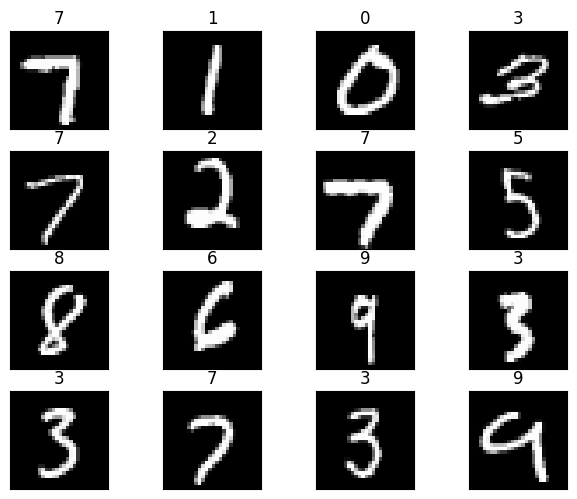

In [11]:
fig, axs = plt.subplots(4,4)
for ax in axs.flatten():
    idx = np.random.randint(0, len(X_train))
    ax.imshow(X_train[idx], cmap='gray')
    ax.set_title(y_train[idx])
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout(pad=0)

**Pre-process the images data before neural network training**

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

**One-hot encode labels**

In [13]:
from src.encoders import OneHotEncoder
num_classes = 10
y_train_onehot = OneHotEncoder.encode(y_train, num_labels=num_classes)

**Initiate the neural network**

In [14]:
from src.neural import Neural
nn = Neural(input_size = X_train.shape[1], hidden1_size = 128, hidden2_size = 64, output_size = 10)

**Train the neural network**

In [15]:
max_epochs=10
#progress_func=lambda epoch, train_accuracy: print(f"Epoch {epoch + 1: >2}/{max_epochs}, Accuracy training set: {train_accuracy:.4f}")
progress_func=lambda epoch, train_accuracy: print(f"Epoch {epoch}")

nn.train(X_train=X_train, y_train=y_train_onehot, learning_rate=0.1, epochs=max_epochs, batch_size=64, progress_func=progress_func)

**Check the accuracy score and predictions for the test set**

In [16]:
print(f"Training accuracy: {nn.score(X_train, y_train)}")
print(f"Test accuracy: {nn.score(X_test, y_test)}")
predictions = nn.predict(X_test)
predictions

Training accuracy: 0.9720833333333333
Test accuracy: 0.959


array([7, 2, 1, ..., 4, 5, 6])